# Using UMAP to visualize the microenvironment of cell-cell communication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd

## Load predicted cell-cell communication data and spatial transcriptome data  

In [2]:
CellPair = pd.read_csv("./cell_pair_all.csv",dtype=str, delimiter=',')#The predicted cell-cell communication at single-cell resolution
st_data = pd.read_csv("./ad_st_new.csv",dtype=str, delimiter=',')#The processed spatial transcriptome data
st_data = pd.DataFrame(st_data).set_index('Unnamed: 0').rename_axis(None, axis=1)

## Filter for cell types of interest  

In [3]:
CellPairnew = CellPair[(CellPair['celltype_sender'].isin(['L2/3_IT','L4','L5_IT','L6_IT','L6_CT'])) 
    & (CellPair['celltype_receiver'].isin(['L2/3_IT','L4','L5_IT','L6_IT','L6_CT']))] # Select the cell type of interest for both sender and receiver  
CellPairnew = CellPairnew[CellPairnew['label']=='1']

In [4]:
CellPairnew

,cell_sender,cell_receiver,celltype_sender,celltype_receiver,ligand,receptor,label
2261916,C1008,C1297,L2/3_IT,L5_IT,Pdgfb,Pdgfrb,1
2261922,C1009,C1297,L2/3_IT,L5_IT,Pdgfb,Pdgfrb,1
2261938,C1011,C1297,L2/3_IT,L5_IT,Pdgfb,Pdgfrb,1
2261960,C1202,C1210,L2/3_IT,L5_IT,Pdgfb,Pdgfrb,1
2261961,C1488,C2288,L2/3_IT,L5_IT,Pdgfb,Pdgfrb,1
...,...,...,...,...,...,...,...
5182626,C4227,C2428,L4,L6_IT,Psen1,Fzd3,1
5182627,C4228,C2429,L4,L6_IT,Psen1,Fzd3,1
5182628,C4228,C2428,L4,L6_IT,Psen1,Fzd3,1
5182629,C4852,C5019,L4,L6_IT,Psen1,Fzd3,1


## Extract relevant columns  

In [5]:
cell_sender = list(CellPairnew['cell_sender'].values)
cell_receiver = list(CellPairnew['cell_receiver'].values)
ligand = list(CellPairnew['ligand'].values)
receptor = list(CellPairnew['receptor'].values)

## Calculate communication score between each pair of cells  

In [6]:
score = []
for i in range(len(cell_sender)):
    sco = np.sqrt(float(st_data[cell_sender[i]][ligand[i]]) * float(st_data[cell_receiver[i]][receptor[i]]))
    score.append(sco)
CellPairnew['score'] = score


## Reshape the DataFrame for easier visualization and analysis  

In [7]:
df = CellPairnew
df['row_index'] = df['cell_sender'].astype(str) + '-' + df['cell_receiver'].astype(str)  
  
# 创建列索引：ligand和receptor的组合  
df['col_index'] = df['ligand'].astype(str) + '-' + df['receptor'].astype(str)  
  
result_df = df.pivot(index='row_index', columns='col_index', values='score')  
  
result_df = result_df.fillna(0)  
pivot_df = result_df.rename_axis(index=None, columns=None)
pivot_df.T.to_csv('./output.csv', index=True) 

In [8]:
pivot_df

,Adcyap1-Fgfr3,Adcyap1-Fzd1,Adcyap1-Il11ra1,Agt-Prlr,Anxa1-Pde1b,Apoe-Bmpr2,Apoe-Grm5,B2m-Pde1c,Bdnf-Flt3,Bdnf-Fzd8,...,Wnt2-Fzd9,Wnt2-Prlr,Wnt3-Il4ra,Wnt4-Itga7,Wnt4-Itgb4,Wnt4-Trpc5,Wnt7a-Itga4,Wnt7b-Npr1,Wnt9a-Erbb2,Wnt9b-Fzd1
C100-C107,0.0,4.688497,4.569464,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.015507,0.0,0.0,0.0,0.0
C100-C115,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.091100,0.0,0.0,0.0,0.0
C1000-C1007,0.0,4.454144,4.288240,0.0,0.0,0.0,0.0,0.0,5.157490,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
C1000-C1008,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
C1000-C1009,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C999-C2020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
C999-C2021,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
C999-C2022,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.394378,0.0,...,0.0,0.0,0.0,0.0,0.0,1.911544,0.0,0.0,0.0,0.0
C999-C2024,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Prepare metadata for visualization  

In [9]:
meta_df = pivot_df
row_tuples = meta_df.index.tolist()
sender = [s.split('-')[0] for s in row_tuples]  
receiver = [s.split('-')[1] for s in row_tuples]
sender_type_dict = CellPairnew.set_index('cell_sender')['celltype_sender'].to_dict()  
receiver_type_dict = CellPairnew.set_index('cell_receiver')['celltype_receiver'].to_dict()  
sender_type = [sender_type_dict[s] for s in sender]  
receiver_type = [receiver_type_dict[r] for r in receiver]
meta_df['SendingType'] = sender_type
meta_df['ReceivingType'] = receiver_type
df_selected = meta_df[['SendingType', 'ReceivingType']]  
df_selected.to_csv('./meta_cell.csv', index=True)

# Visualize Cell-cell communications through UMAP

In [10]:
CellMatrix = sc.read_csv("./output.csv", delimiter=',', first_column_names=True).T
metadata = pd.read_csv("./meta_cell.csv",dtype=str, delimiter=',')
CellMatrix.obs =  pd.DataFrame(metadata).set_index('Unnamed: 0').rename_axis(None, axis=1)


In [11]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)

In [12]:
celltype_colors = {  
    "L2/3_IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5_IT": "#2ca02c",
    "L6_IT": "#d62728",
    "L6_CT": "#9467bd"
}  
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['ReceivingType'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True)  

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


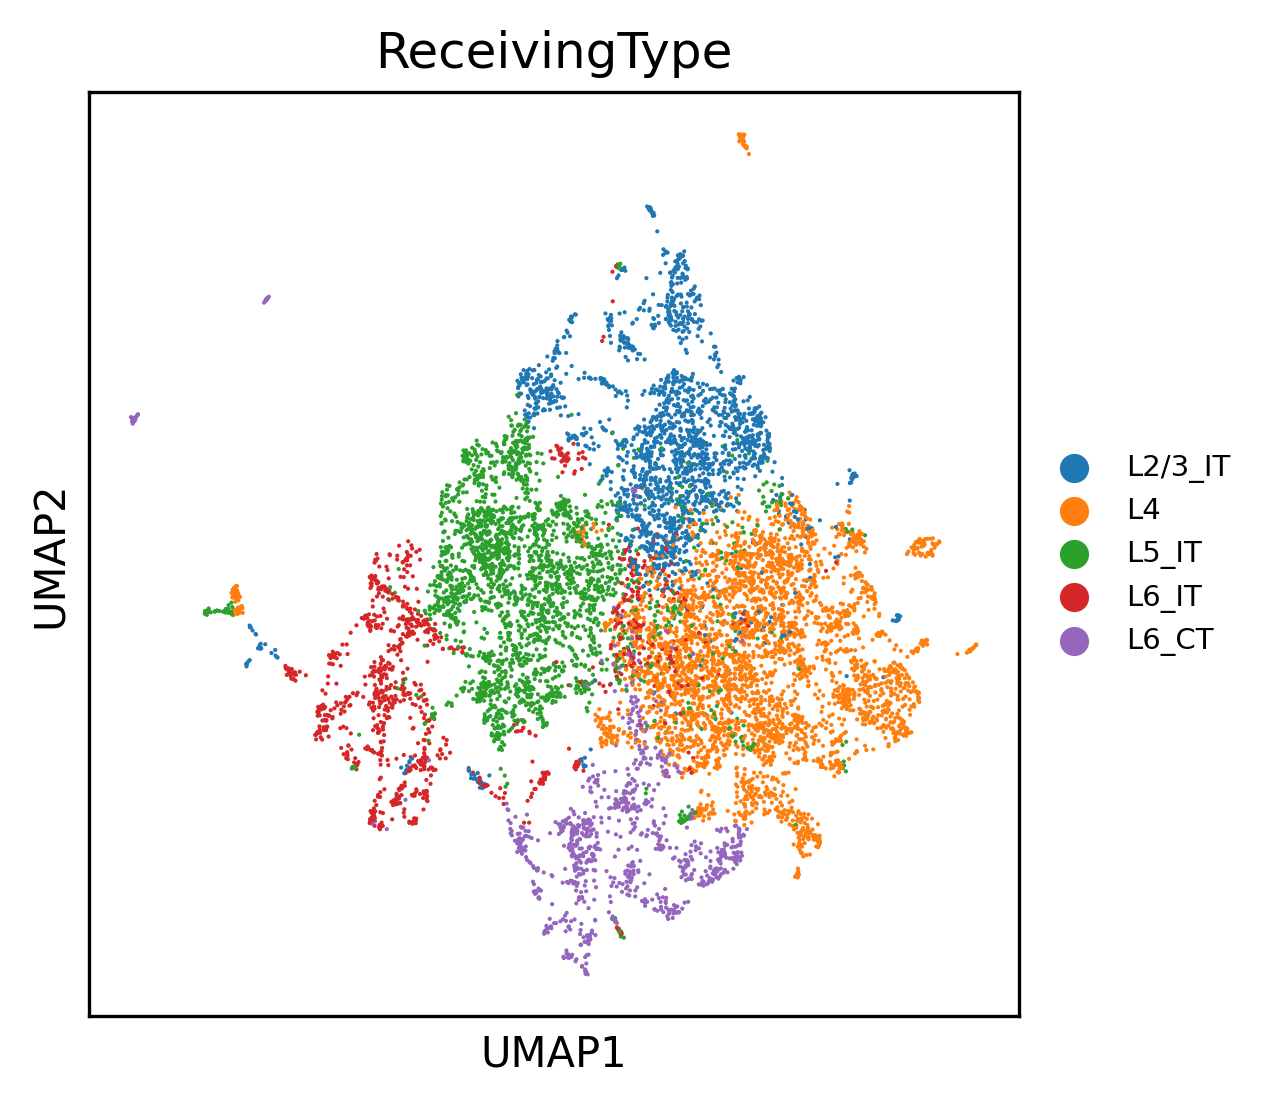

In [13]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=4,legend_loc ="right margin",legend_fontsize=7, title= 'ReceivingType'
              )

# Visualize cellular microenvironment

In [14]:
de_new = CellPairnew
de_new = de_new.drop(['row_index'], axis=1) 
de_new = de_new.drop(['col_index'], axis=1)
merged_df = de_new.groupby(['cell_receiver', 'celltype_receiver','ligand', 'receptor'])['score'].mean().reset_index()  
merged_df['Neighborhood-cell_receiver'] = 'Neighborhood-' + merged_df['cell_receiver']  
merged_df = merged_df.set_index('Neighborhood-cell_receiver')
merged_df

,cell_receiver,celltype_receiver,ligand,receptor,score
Neighborhood-cell_receiver,,,,,
Neighborhood-C100,C100,L4,Anxa1,Pde1b,0.000000
Neighborhood-C100,C100,L4,Bgn,Bmpr2,0.000000
Neighborhood-C100,C100,L4,Bmp2,Bmpr2,4.227351
Neighborhood-C100,C100,L4,Btla,Crhr1,0.000000
Neighborhood-C100,C100,L4,Clu,Bmpr2,5.971381
...,...,...,...,...,...
Neighborhood-C999,C999,L4,Ucn,Crhr1,0.447072
Neighborhood-C999,C999,L4,Vegfc,Fzd3,0.593461
Neighborhood-C999,C999,L4,Wnt2,Adora1,1.415765


In [15]:
merged_df['column_name'] = merged_df.apply(lambda row: f"{row['ligand']}-{row['receptor']}", axis=1)  
merged_df['row_name'] = merged_df.apply(lambda row: f"Neighborhood-{row['cell_receiver']}", axis=1)  
merged_df = merged_df.set_index(['row_name', 'column_name'])  
result_df = merged_df['score'].unstack(fill_value=0)  
result_df.index.name = None  
result_df.columns.name = None  
result_df

,Adcyap1-Fgfr3,Adcyap1-Fzd1,Adcyap1-Il11ra1,Agt-Prlr,Anxa1-Pde1b,Apoe-Bmpr2,Apoe-Grm5,B2m-Pde1c,Bdnf-Flt3,Bdnf-Fzd8,...,Wnt2-Fzd9,Wnt2-Prlr,Wnt3-Il4ra,Wnt4-Itga7,Wnt4-Itgb4,Wnt4-Trpc5,Wnt7a-Itga4,Wnt7b-Npr1,Wnt9a-Erbb2,Wnt9b-Fzd1
Neighborhood-C100,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,3.875497,0.0,0.0,0.0,0.0
Neighborhood-C1000,0.0,0.0,2.225493,0.000000,0.115015,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,2.832723,0.0,0.0,0.0,0.0
Neighborhood-C1001,0.0,0.0,0.000000,0.000000,0.117994,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Neighborhood-C1002,0.0,0.0,1.434338,0.371678,0.138673,0.0,0.0,0.0,0.0,0.0,...,0.0,1.233159,0.0,0.0,0.000000,1.059626,0.0,0.0,0.0,0.0
Neighborhood-C1003,0.0,0.0,0.000000,0.000000,0.121405,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Neighborhood-C995,0.0,0.0,2.377453,0.224188,0.296147,0.0,0.0,0.0,0.0,0.0,...,0.0,0.999428,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Neighborhood-C996,0.0,0.0,2.094696,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Neighborhood-C997,0.0,0.0,1.618826,0.000000,0.364050,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Neighborhood-C998,0.0,0.0,0.000000,0.000000,0.121740,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,2.853785,0.0,0.0,0.0,0.0


In [16]:
df_dropped = merged_df.drop(['ligand', 'receptor','score'], axis=1) 
df_no_duplicates = df_dropped.drop_duplicates()  
df_no_duplicates.to_csv('./selectmeta_cell.csv', index=True)  
df_no_duplicates

,,cell_receiver,celltype_receiver
row_name,column_name,,
Neighborhood-C100,Anxa1-Pde1b,C100,L4
Neighborhood-C1000,Adcyap1-Il11ra1,C1000,L4
Neighborhood-C1001,Anxa1-Pde1b,C1001,L4
Neighborhood-C1002,Adcyap1-Il11ra1,C1002,L4
Neighborhood-C1003,Anxa1-Pde1b,C1003,L4
...,...,...,...
Neighborhood-C995,Adcyap1-Il11ra1,C995,L4
Neighborhood-C996,Adcyap1-Il11ra1,C996,L4
Neighborhood-C997,Adcyap1-Il11ra1,C997,L4


In [17]:
CellMatrix = sc.AnnData(result_df) 
metadata = pd.read_csv("./selectmeta_cell.csv",dtype=str, delimiter=',')
CellMatrix.obs =  pd.DataFrame(metadata).set_index('row_name').rename_axis(None, axis=1)

In [18]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)

In [19]:
celltype_colors = {  
    "L2/3_IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5_IT": "#2ca02c",
    "L6_IT": "#d62728",
    "L6_CT": "#9467bd"
}   
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['celltype_receiver'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True)  

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


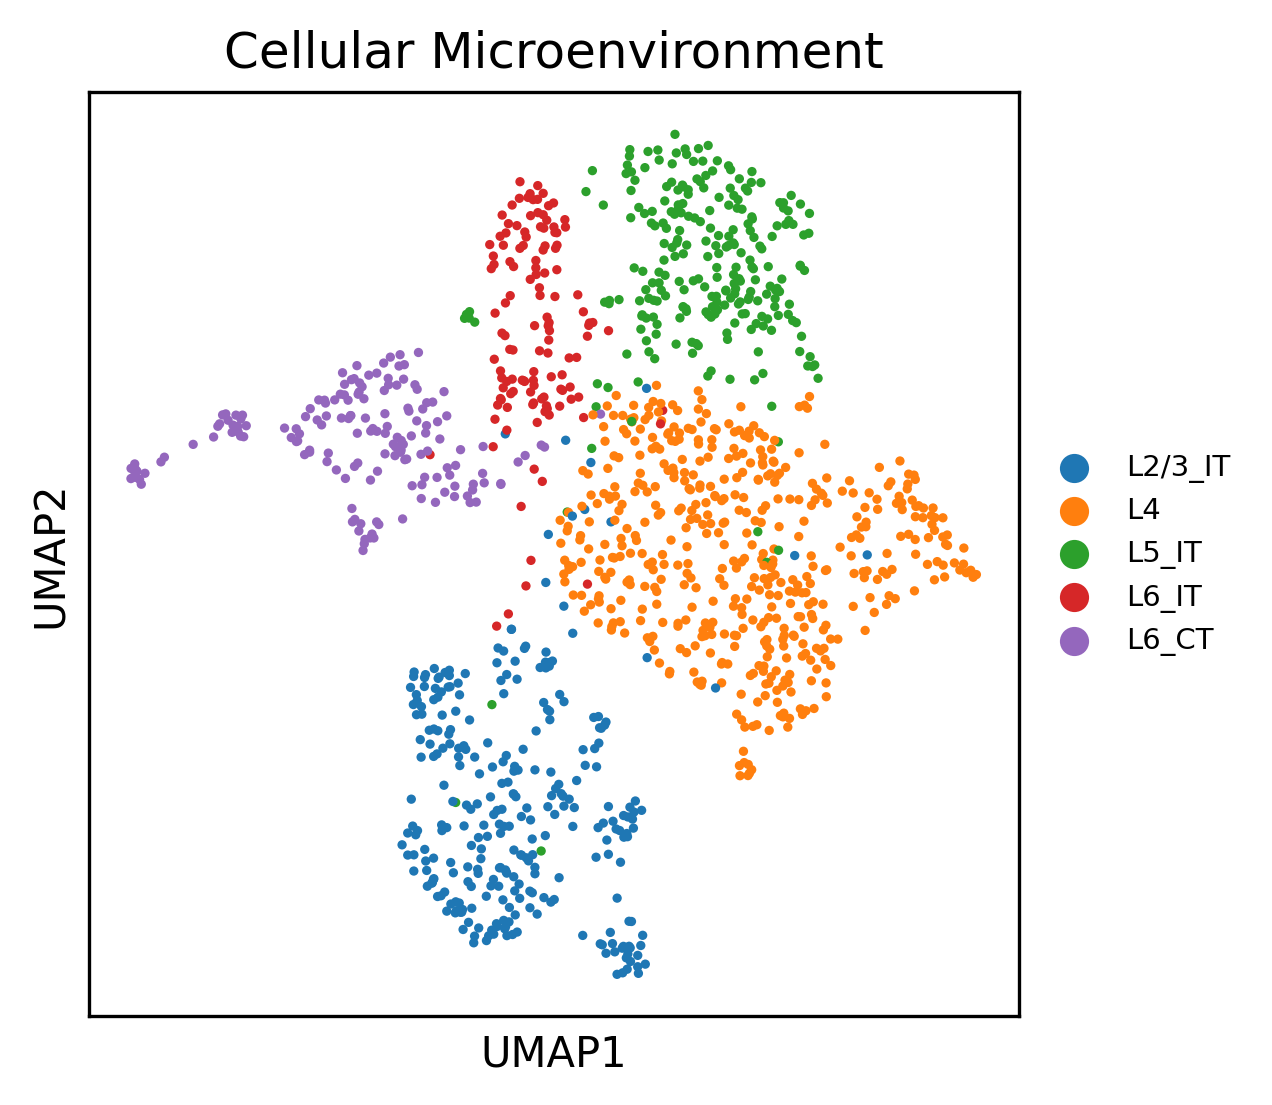

In [20]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=20,legend_loc ="right margin",legend_fontsize=7, title= 'Cellular Microenvironment'
              )